# Classification Project

## Project Motive 
Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist.
## Data

**Columns:**

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* culmen_length_mm: culmen length (mm)
* culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* sex: penguin sex

In [1]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from IPython.display import Image,display_svg, SVG

In [2]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the CSV file
df = pd.read_csv('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/penguins_size.csv')

In [4]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [5]:
df.sample(5)

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
41   Adelie      Dream              40.8             18.4              195.0   
285  Gentoo     Biscoe              49.8             16.8              230.0   
284  Gentoo     Biscoe              45.8             14.2              219.0   
292  Gentoo     Biscoe              48.2             15.6              221.0   
129  Adelie  Torgersen              44.1             18.0              210.0   

     body_mass_g     sex  
41        3900.0    MALE  
285       5700.0    MALE  
284       4700.0  FEMALE  
292       5100.0    MALE  
129       4000.0    MALE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Checking total number of NULL values in each column
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

**Inference:**
* There are NULL values in 'sex' column

### Removing null values in 'sex' column

In [8]:
# Dropping NULL Values in 'sex' column and setting 'inplace=True' to save the action
df.dropna(subset=['sex'],axis=0,inplace=True)

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

* Now,there are no NULL values in any column
* That means,on removing NULL values in 'sex' column had removed those records in which other columns are also NULL 

In [10]:
df.shape

(334, 7)

In [11]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Axes: >

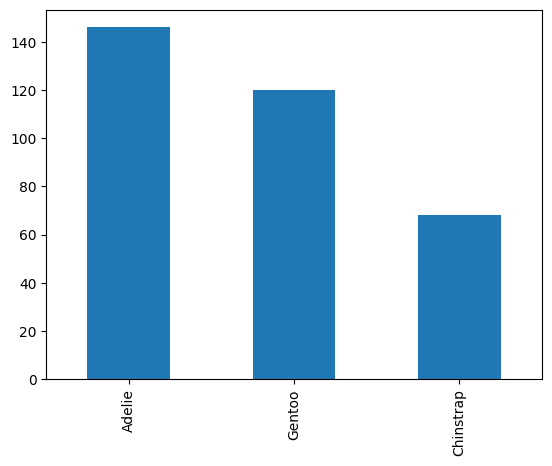

In [12]:
# Barplot of 'species' (Categorical column)
df.species.value_counts().plot(kind='bar')

<Axes: >

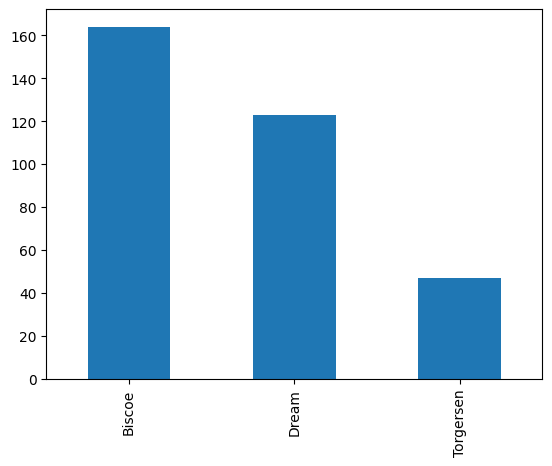

In [13]:
# Barplot of 'island' (Categorical column)
df.island.value_counts().plot(kind='bar')

In [14]:
# Checking value_counts for 'sex' column
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [15]:
# Getting index of that 1 record which contains invalid value for sex
df[df['sex'] == '.'].index

Int64Index([336], dtype='int64')

In [16]:
# Dropping row of index 336
df = df.drop(336,axis=0)

In [17]:
df[df['sex'] == '.']

Empty DataFrame
Columns: [species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

<Axes: >

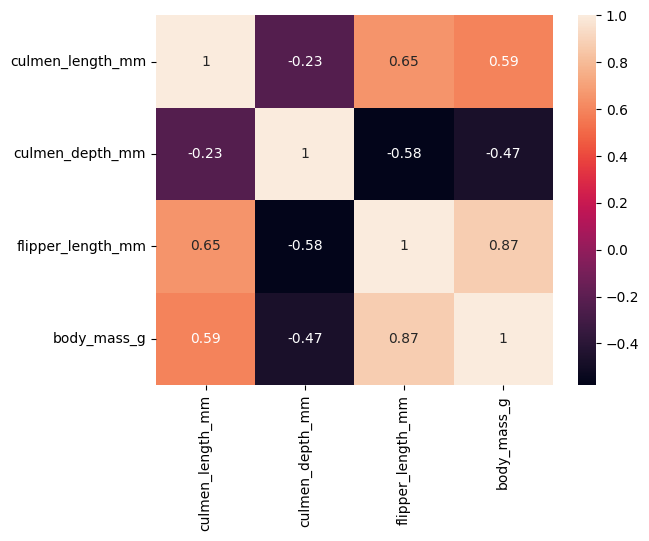

In [18]:
# Getting Heatmap of Correlation
sns.heatmap(df.corr(),annot=True)

**Inference:**
* High positive correlation is in between 'body_mass_g' and 'flipper_length_mm'

**Multiple plots between numerical columns**
* **Scatterplot,Histogram,Rugplot**
* **Regression line(using Ordinary Least Squares Method) based on classification of 'species'**

In [19]:
px.scatter(data_frame=df,x='flipper_length_mm',y='body_mass_g',color='species',
           symbol='species',marginal_x='histogram',marginal_y='rug',trendline='ols',
           width=1100,height=800,title="body_mass_g vs filpper_length_mm")

In [20]:
px.scatter(data_frame=df,x='flipper_length_mm',y='culmen_length_mm',color='species',
           symbol='species',marginal_x='histogram',marginal_y='rug',trendline='ols',
           width=1100,height=800,title="culmen_length_mm vs flipper_length_mm")

In [21]:
px.scatter(data_frame=df,x='culmen_depth_mm',y='flipper_length_mm',color='species',
           symbol='species',marginal_x='histogram',marginal_y='rug',trendline='ols',
           width=1100,height=800,title="flipper_length_mm vs culmen_depth_mm")

**Inference:**
* **Clustering(clear grouping) based on 'species' column is seen in scatterplot of 'flipper_length_mm' and 'culmen_length_mm'**

In [22]:
px.box(data_frame=df,x='species',y='culmen_depth_mm',color='island',title="Boxplot of 'culmen_depth_mm' column")

**Inference:**
* **There are no 'Chinstrap' penguins in 'Torgersen' and 'Biscoe' islands**
* **There are no 'Gentoo' penguins in 'Torgersen' and 'Dream' islands**

In [23]:
px.violin(data_frame=df,x='species',y='flipper_length_mm',color='sex',box=True,title="Violin plot between 'flipper_length_mm vs species'")

**Importing useful functions from Scikit Learn**

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay,confusion_matrix

## Train-Test Split

In [25]:
X = df.drop('species',axis=1)
y = df['species']
# Splitting the X,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)
# Getting shapes
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((249, 6), (84, 6), (249,), (84,))

## One-Hot Encoding

In [28]:
# Creating instance of OneHotEncoder and dropping first variable among dummy variables
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [30]:
# Fitting and Transforming with only Categorical Data for X_train
X_train_new = ohe.fit_transform(X_train[['island','sex']])

In [31]:
# Transforming with only Categorical Data for X_test
X_test_new = ohe.transform(X_test[['island','sex']])

In [34]:
# Getting the shapes of Categorically encoded X Data
X_train_new.shape , X_test_new.shape

((249, 3), (84, 3))

In [64]:
# Horizontally stacking the Categorically encoded data with Numerical/Continuous columns of X_train
ohe_X_train = np.hstack((X_train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].values
           ,X_train_new))

In [65]:
# Horizontally stacking the Categorically encoded data with Numerical/Continuous columns of X_test
ohe_X_test = np.hstack((X_test[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].values
           ,X_test_new))

In [42]:
print(f'Shape of ohe_X_train is {ohe_X_train.shape}\nShape of ohe_X_test is {ohe_X_test.shape}')
print(f'Shape of X_train is {X_train.shape}\nShape of X_test is {X_test.shape}')

Shape of ohe_X_train is (249, 7)
Shape of ohe_X_test is (84, 7)
Shape of X_train is (249, 6)
Shape of X_test is (84, 6)


## Mutual Information 

* **Mutual information (MI) between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency**

In [ ]:
# Getting Mutual Information of each X_train column with y_train
mutual_info = mutual_info_classif(X_train,y_train)

In [ ]:
mutual_info

In [ ]:
# Making those mutual_info values as pandas series
mutual_info_series = pd.Series(mutual_info)
# Changing the index of series from numbers to column names
mutual_info_series.index = X_train.columns

In [ ]:
# Sorting and printing the series
mutual_info_series.sort_values(ascending=False)

**Inference:**
* **Target column('species') has high dependency with flipper_length_mm,culmen_length_mm,culmen_depth_mm,body_mass_g**

### Scaling the X data

In [67]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(ohe_X_train)
scaled_X_test = scaler.transform(ohe_X_test)

## Support Vector Classifier

* SVM algorithm creates the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a **hyperplane**.
* The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a **Support vector**.
* The distance between the vectors and the hyperplane is called as **margin**.
* The goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the **optimal hyperplane**.

**SVM Kernel:**
   * SVM kernel is a function that takes low dimensional input space and transforms it into higher-dimensional space, ie it converts non separable problem to separable problem. 
   * It is mostly useful in non-linear separation problems.
   * Kernel does some extremely complex data transformations then finds out the process to separate the data based on the labels or outputs defined

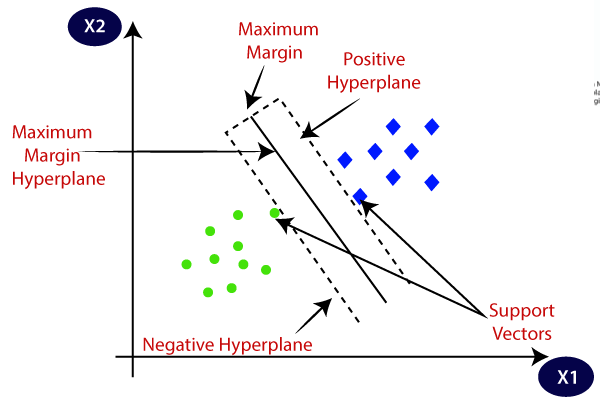

In [44]:
Image('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/Images/svm.png')

In [45]:
# Creating instance of SVC model with suitable parameters
svc = SVC(C=1.0,kernel='rbf',gamma='scale',random_state=True)
# Fitting the model
svc.fit(scaled_X_train,y_train)

SVC(random_state=True)

In [46]:
print('\033[1m'+'Accuracy score is ',accuracy_score(y_test,svc.predict(scaled_X_test)))

Accuracy score is  0.9761904761904762


In [47]:
print(classification_report(y_test,svc.predict(scaled_X_test)))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        32
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



## DecisionTree Classifier

* It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

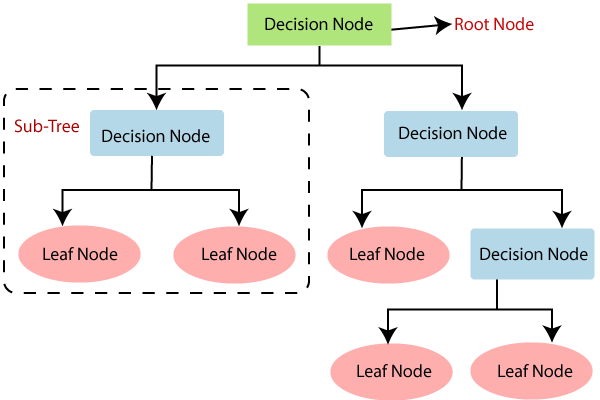

In [48]:
Image('../Downloads/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/decision-tree-classification-algorithm.png')

In [49]:
# Creating instance of DecisionTree Classifier model with suitable parameters
dtc = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,random_state=True) 
# Fitting the model
dtc.fit(scaled_X_train,y_train)

DecisionTreeClassifier(random_state=True)

In [50]:
print('\033[1m'+'Accuracy score is ',accuracy_score(y_test,dtc.predict(scaled_X_test)))

Accuracy score is  0.9761904761904762


In [51]:
print(classification_report(y_test,dtc.predict(scaled_X_test)))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        32
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       0.97      1.00      0.99        33

    accuracy                           0.98        84
   macro avg       0.98      0.97      0.98        84
weighted avg       0.98      0.98      0.98        84



## Comparing Confusion Matrices of above 2 models
* **To plot 2 Confusion Matrices side by side we are going to use ConfusionMatrixDisplay function,which takes more than 1 Confusion Matrix and plots it in subplots**

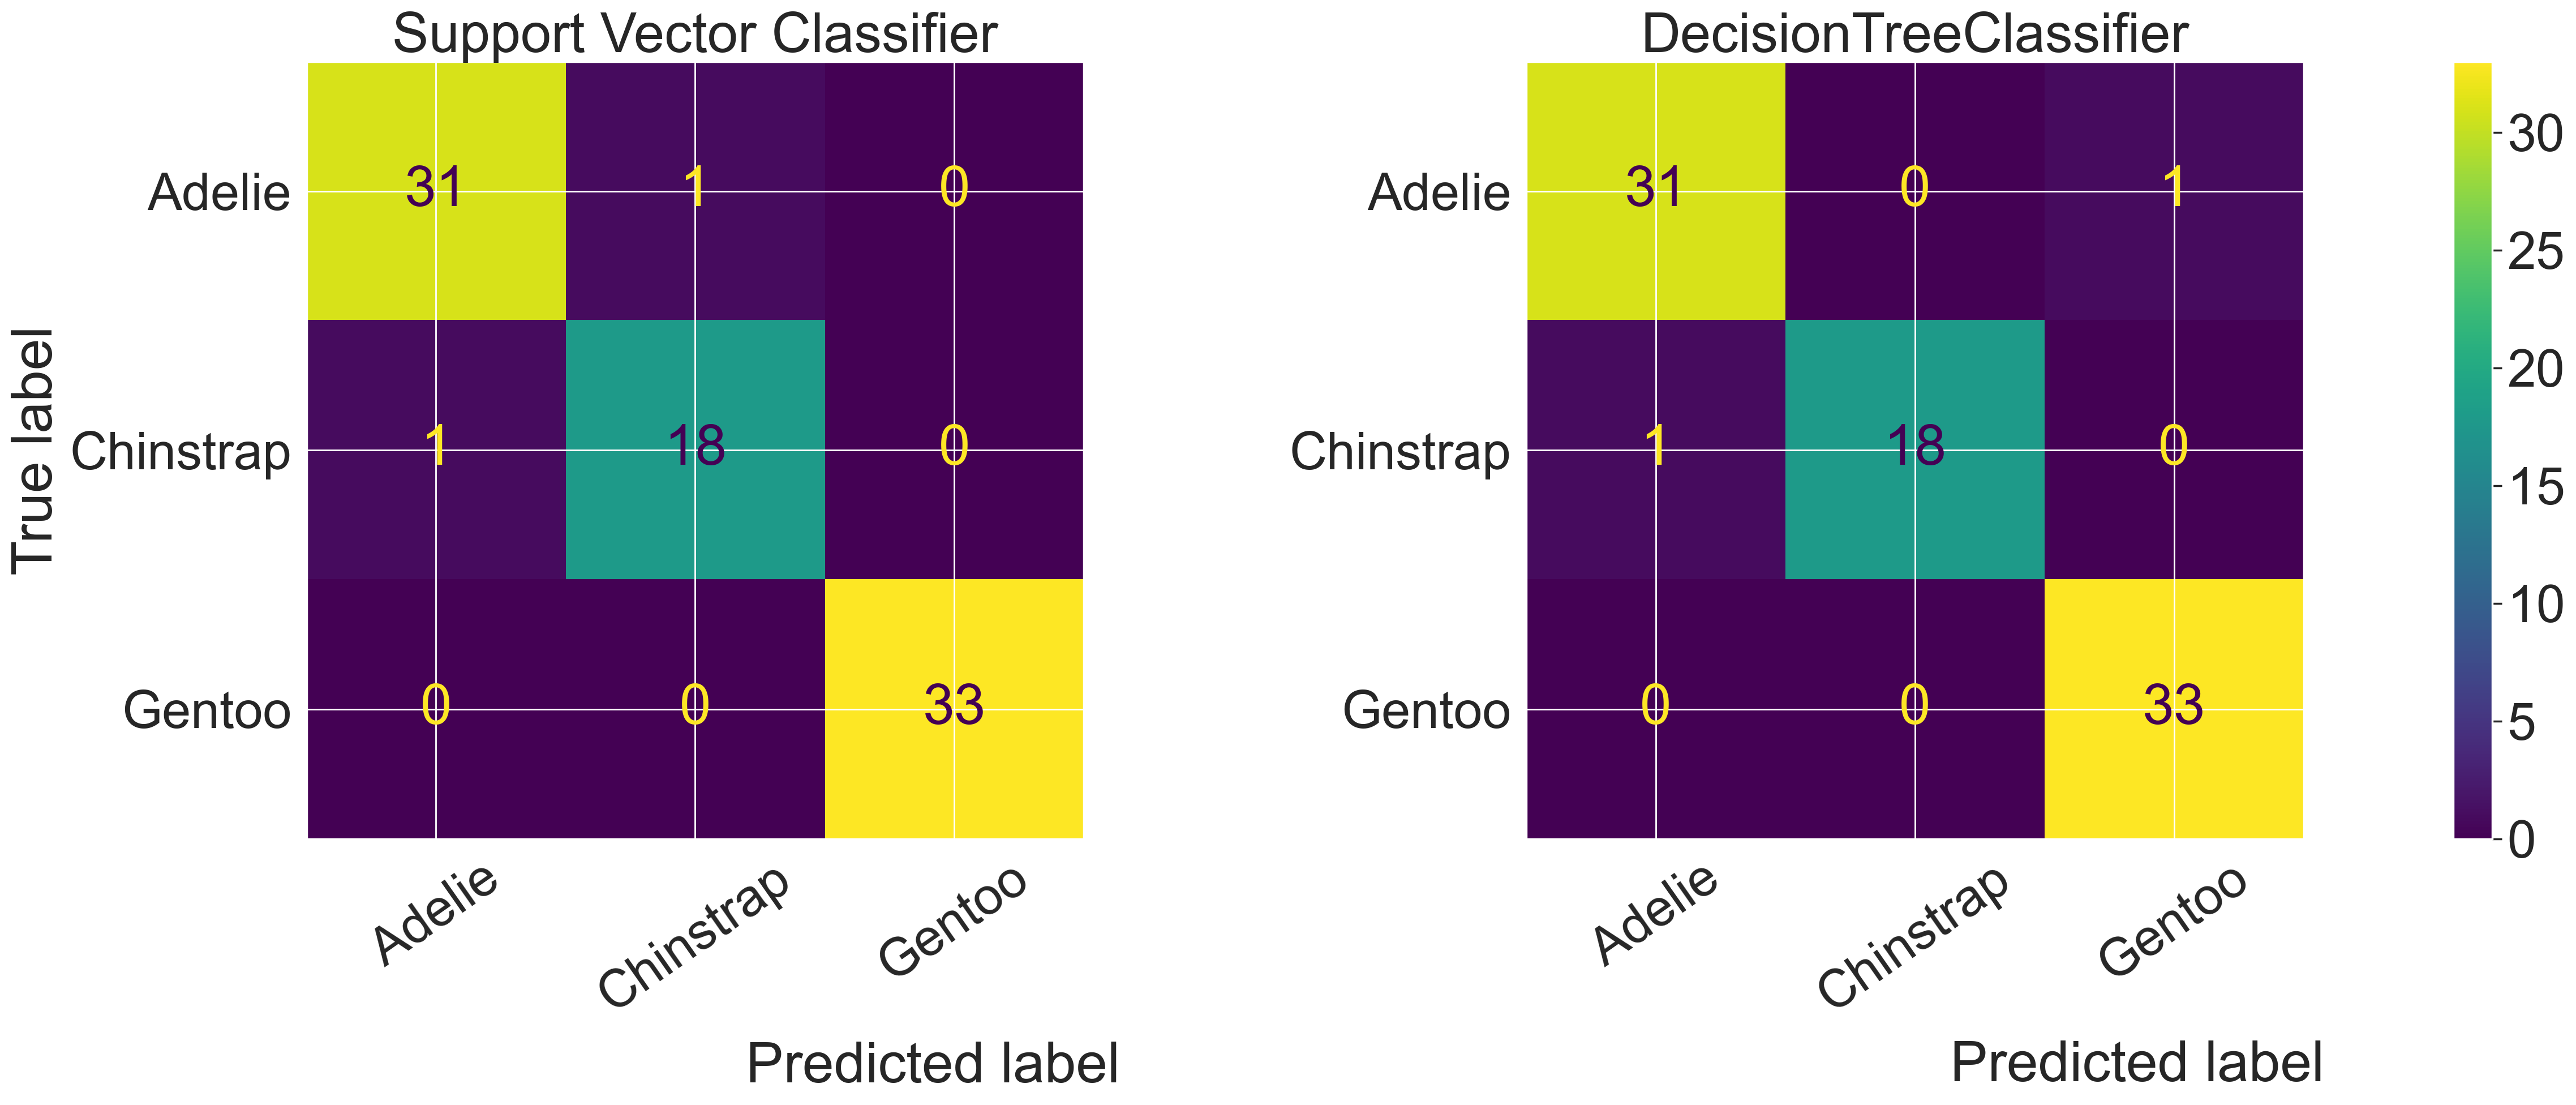

In [53]:
# Initialising classification algorithms as a dictionary
classifiers = {
    "Support Vector Classifier": SVC(C=1.0,kernel='rbf',gamma='scale',random_state=True),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,random_state=True),
}

# Creating subplots of shape 1X2
fig, axes = plt.subplots(1, 2, figsize=(28,10),dpi=200)
# Setting font_scale(fontsize) using seaborn
sns.set(font_scale=3.0)  

# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(classifiers.items()):
    # Fitting and getting predictions from classifier model
    y_pred = classifier.fit(scaled_X_train, y_train).predict(scaled_X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['Adelie','Chinstrap','Gentoo'])
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':35})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.3, 0, 'Predicted label', ha='left')
fig.text(0.68, 0.001, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()        

**Inference:**
* **Both Support Vector Classification Model and DecisionTree Classifiation Model are performing well**
* **I'm choosing Decision Tree model as final model**

#### Let's perform GridSearchCV for both algorithms with their respective parameters

In [54]:
# Creating grids for SVC and DecisionTree models
svc_grid = {'C':[0.001,0.01,0.1,0.25,0.5,0.75,10.1,0.25,0.5,0.75,0.9],
           'kernel':['liner','rbf','poly','sigmoid'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],
           'max_iter':[-1,10,25,50,100]}

dtc_grid = {'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_depth':[3,4,5,6,None],
           'min_samples_split':[25,30,40],
           'max_features':['auto','sqrt','log2']}

In [55]:
# Creating GridSearchCV models for SVC and DecisionTree classifiers
svc_grid_model = GridSearchCV(SVC(random_state=True),param_grid=svc_grid,scoring='accuracy',cv=5)

dtc_grid_model = GridSearchCV(DecisionTreeClassifier(random_state=True),param_grid=dtc_grid,
                              scoring='accuracy',cv=5)

In [56]:
# Fitting the grid models
svc_grid_model.fit(scaled_X_train,y_train)

dtc_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [25, 30, 40],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
# Getting best parameters
print('\033[1m'+'Best parameters for SVC model are ',svc_grid_model.best_params_)
print('\033[1m'+'Best parameters for DecisionTree model are ',dtc_grid_model.best_params_)

Best parameters for SVC model are  {'C': 0.25, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 10}
Best parameters for DecisionTree model are  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 30, 'splitter': 'best'}


## Comparing Confusion Matrices for GridSearchCV models

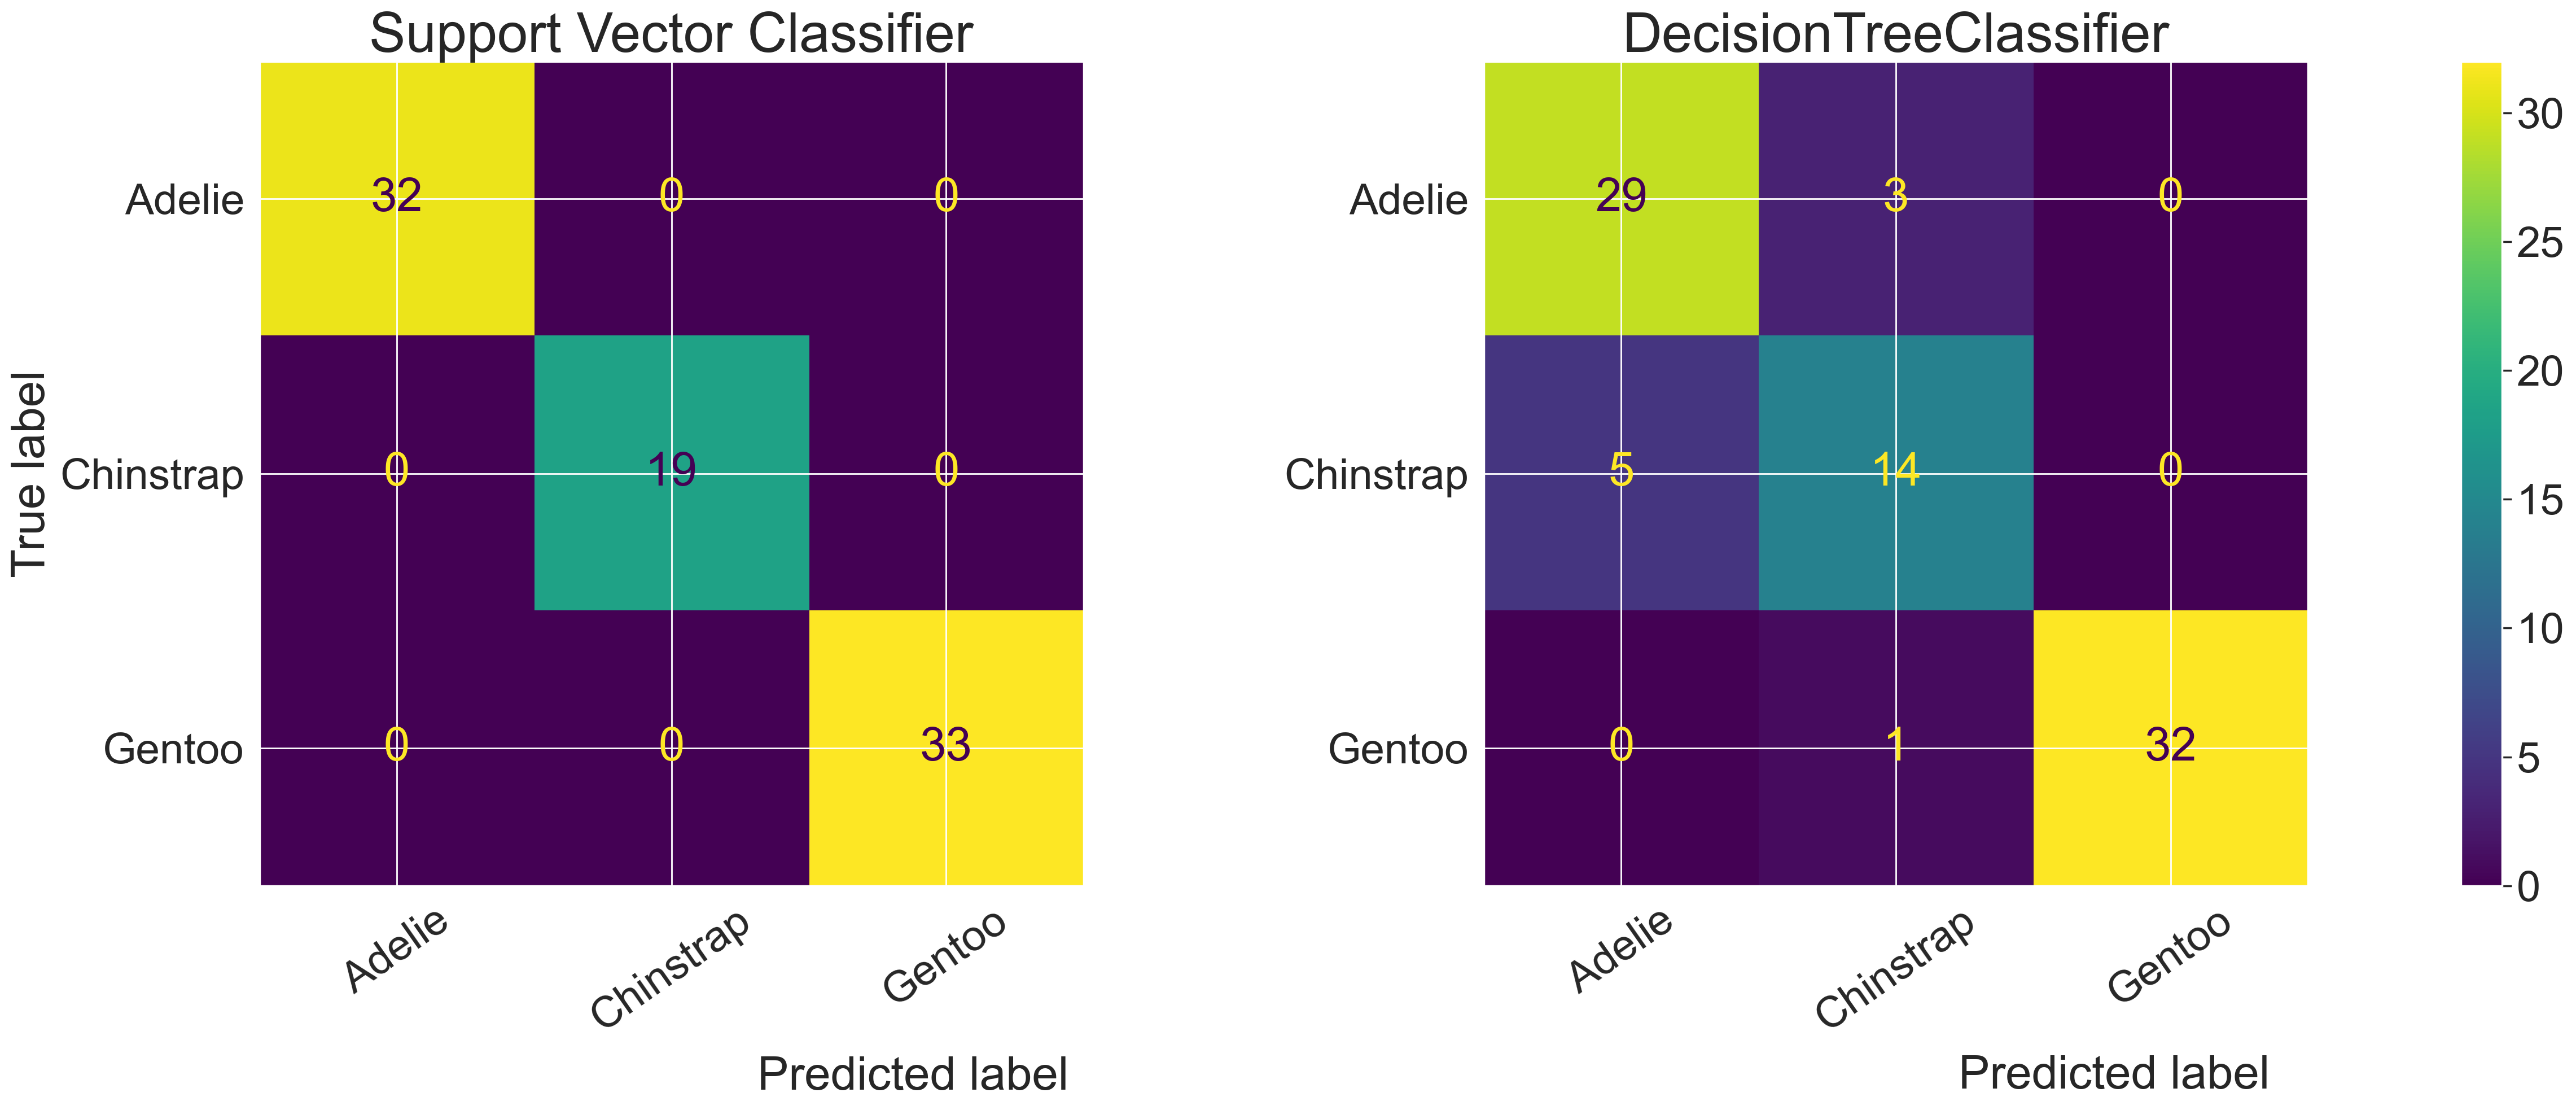

In [59]:
# Initialising grid classification models as a dictionary
classifiers = {
    "Support Vector Classifier": svc_grid_model,
    "DecisionTreeClassifier": dtc_grid_model
}
# Creating subplots of shape 1X2
fig, axes = plt.subplots(1, 2, figsize=(28,10),dpi=200)
# Setting font_scale(fontsize) using seaborn
sns.set(font_scale=2.5)

# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(classifiers.items()):
    # Fitting and getting predictions from classifier model
    y_pred = classifier.fit(scaled_X_train, y_train).predict(scaled_X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['Adelie','Chinstrap','Gentoo'])
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':35})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.3, 0, 'Predicted label', ha='left')
fig.text(0.68, 0.001, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()        

**Inference:**
* **Number of mis-classification's in both grid models are same.**

**I am going to select DecisionTree Classifier as our final_model**

## Final Model

In [60]:
# One-Hot Encoding the categorical data of X data
X_new = ohe.transform(X[['island','sex']])

In [62]:
# Getting the shape of X_new
X_new.shape

(333, 3)

In [69]:
# Horizontally stacking the encoded Categorical data with Numerical/Continuous columns of X
ohe_X = np.hstack((X[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].values,
                  X_new))

In [71]:
# Getting shape of One-Hot Encoded X data
ohe_X.shape

(333, 7)

In [72]:
# Scaling the One-Hot Encoded X data
scaled_ohe_X = scaler.transform(ohe_X)

In [73]:
# Creating the final DecisionTreeClassifier model with best parameters got from GridSearcvCV
final_model = DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='auto',
                                     min_samples_split=25,splitter='best',random_state=True)

In [74]:
# Fitting the scaled-OneHotEncoded X and y
final_model.fit(scaled_ohe_X,y)

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=25,
                       random_state=True)

## Tree Visualization

In [76]:
from sklearn.tree import plot_tree

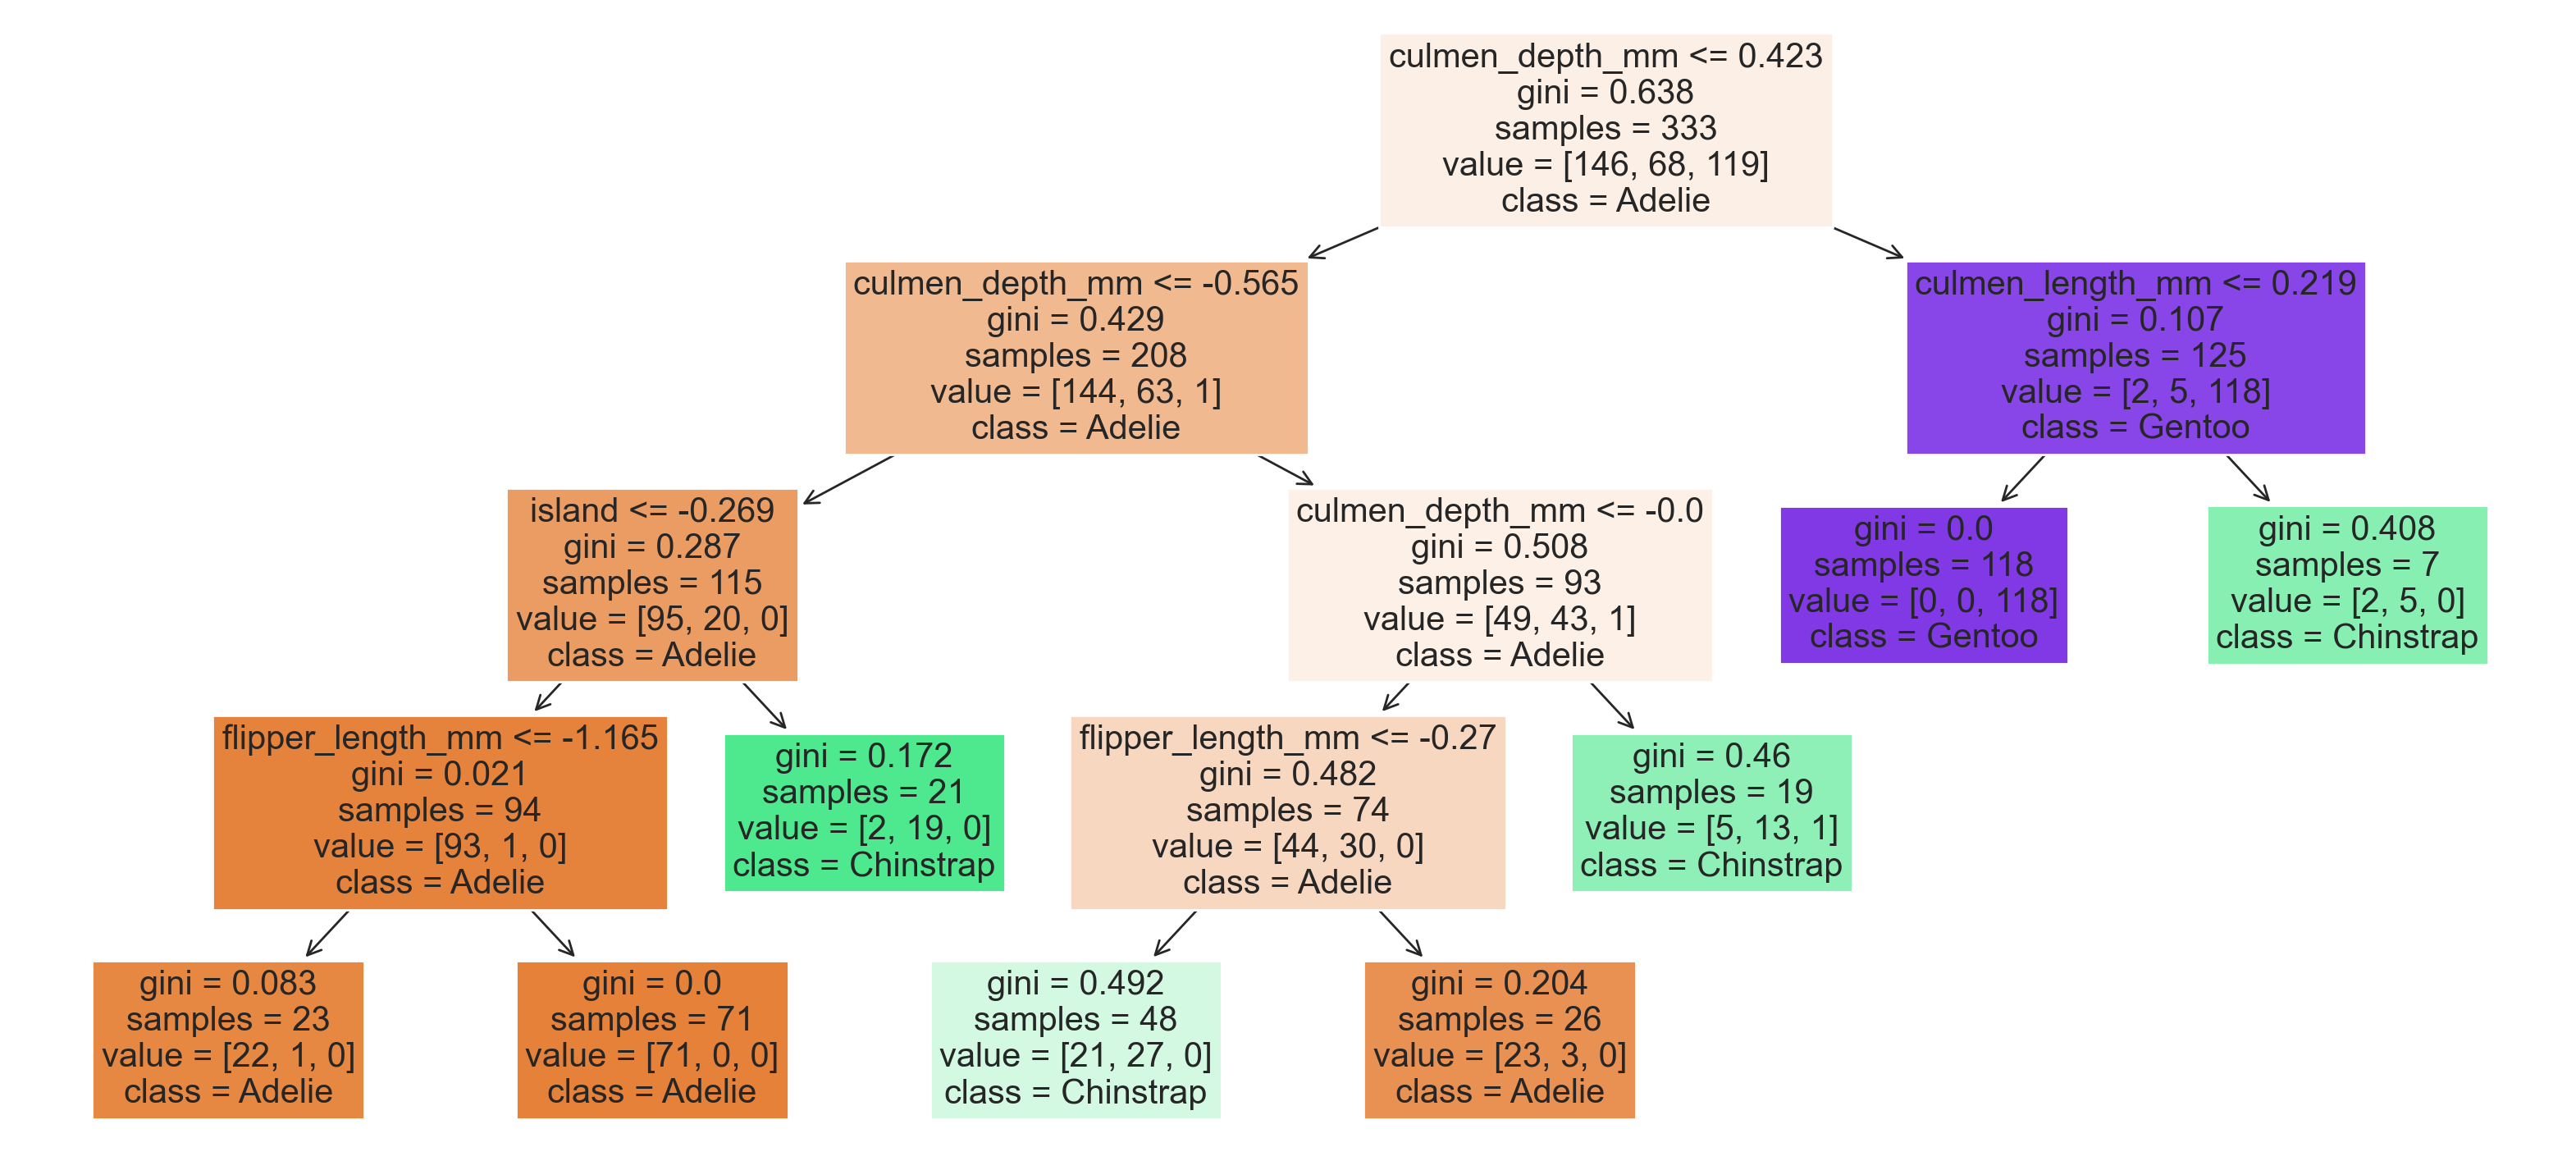

In [78]:
plt.figure(figsize=(20,9),dpi=200)
plot_tree(final_model,fontsize=15,class_names=['Adelie','Chinstrap','Gentoo'],
          feature_names=X.columns,filled=True)
plt.show()

### Using Pickle to save Sklearn Instances

In [79]:
import pickle

In [80]:
# Saving ML Model as pickle file
pickle.dump(final_model,open('penguins_DTclassification.sav','wb'))

In [82]:
# Saving OneHotEncoder as pickle file
pickle.dump(ohe,open('penguins_calssification_ohe.sav','wb'))

In [81]:
# Saving StandardScaler as pickle file
pickle.dump(scaler,open('penguins_classification_scaler.sav','wb'))

### Loading saved ML model,Scaler,One-Hot Encoder

In [83]:
loaded_model = pickle.load(open('penguins_DTclassification.sav','rb'))
loaded_encoder = pickle.load(open('penguins_calssification_ohe.sav','rb'))
loaded_scaler = pickle.load(open('penguins_classification_scaler.sav','rb'))

**Making prediction using loaded model**

In [86]:
# Creating data for making prediction with loaded model
data = ['Biscoe',44.5,14.7,214.0,4850.0,'MALE']

In [87]:
# Encoding the categorical data of given input
loaded_encoder.transform([[data[0],data[5]]])

array([[0, 0, 1]], dtype=int32)

In [88]:
# Horizontally stacking Numerical/Continuous data with Encoded Categorical data
input_data =np.hstack(([[data[1],data[2],data[3],data[4]]],loaded_encoder.transform([[data[0],data[5]]])))

In [89]:
# Scaling the One-Hot Encoded input data
scaled_input_data = loaded_scaler.transform(input_data)

In [90]:
# Making the Prediction
loaded_model.predict(scaled_input_data)

array(['Gentoo'], dtype=object)